In [23]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

# Téléchargez le fichier XML depuis l'URL
url = 'https://julie-sclaunich.emi.u-bordeaux.fr/DATA/API_FR.INR.DPST_DS2_fr_xml_v2_52919.xml'
response = requests.get(url)

# Vérifiez si le fichier a été téléchargé correctement
if response.status_code == 200:
    # Sauvegarder le fichier localement
    xml_file = 'API_FR.INR.DPST_DS2_fr_xml_v2_52919.xml'
    with open(xml_file, 'wb') as file:
        file.write(response.content)

    # Lire et parser le fichier XML localement
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Extraire les données
    data = []
    for record in root.findall('.//record'):
        row = {}
        for field in record.findall('field'):
            name = field.attrib.get('name', '')  # Nom du champ
            value = field.text  # Valeur du champ
            row[name] = value
        data.append(row)

    # Convertir en DataFrame
    df = pd.DataFrame(data)
    print(df.head())  # Affiche les premières lignes
else:
    print(f"Erreur de téléchargement : {response.status_code}")


  Country or Area                           Item  Year Value
0           Aruba  Taux d’intérêt des dépôts (%)  1960  None
1           Aruba  Taux d’intérêt des dépôts (%)  1961  None
2           Aruba  Taux d’intérêt des dépôts (%)  1962  None
3           Aruba  Taux d’intérêt des dépôts (%)  1963  None
4           Aruba  Taux d’intérêt des dépôts (%)  1964  None


In [24]:
del df['Item']
df

,Country or Area,Year,Value
0,Aruba,1960,None
1,Aruba,1961,None
2,Aruba,1962,None
3,Aruba,1963,None
4,Aruba,1964,None
...,...,...,...
17019,Zimbabwe,2019,2.975
17020,Zimbabwe,2020,4.51833333333333
17021,Zimbabwe,2021,8.05916666666667
17022,Zimbabwe,2022,34.72


In [25]:
#on garde les années entre 2013 et 2023
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df[df['Year'] >  2012]
df

,Country or Area,Year,Value
53,Aruba,2013,3.2
54,Aruba,2014,2.3
55,Aruba,2015,1.9
56,Aruba,2016,2
57,Aruba,2017,1.6
...,...,...,...
17019,Zimbabwe,2019,2.975
17020,Zimbabwe,2020,4.51833333333333
17021,Zimbabwe,2021,8.05916666666667
17022,Zimbabwe,2022,34.72


In [26]:
#on ne garde que les pays européens
european_countries = [
    "Albanie", "Allemagne", "Andorre", "Autriche", "Belgique", "Biélorussie",
    "Bosnie-Herzégovine", "Bulgarie", "Croatie", "Danemark", "Espagne", "Estonie",
    "Finlande", "France", "Grèce", "Hongrie", "Irlande", "Islande", "Italie",
    "Kosovo", "Lettonie", "Liechtenstein", "Lituanie", "Luxembourg", "Malte",
    "Moldavie", "Monaco", "Monténégro", "Norvège", "Pays-Bas", "Pologne",
    "Portugal", "République tchèque", "Roumanie", "Royaume-Uni", "Russie",
    "Saint-Marin", "Serbie", "Slovaquie", "Slovénie", "Suède", "Suisse",
    "Ukraine", "Vatican"
]

df = df[df['Country or Area'].isin(european_countries)]

df


,Country or Area,Year,Value
373,Albanie,2013,4.16420494025281
374,Albanie,2014,1.91416666666667
375,Albanie,2015,1.39333333333333
376,Albanie,2016,0.830833333333333
377,Albanie,2017,0.766666666666667
...,...,...,...
16763,Kosovo,2019,None
16764,Kosovo,2020,None
16765,Kosovo,2021,None
16766,Kosovo,2022,None


In [27]:
print(df.isnull().sum())

Country or Area      0
Year                 0
Value              294
dtype: int64


In [28]:
len(df)

429

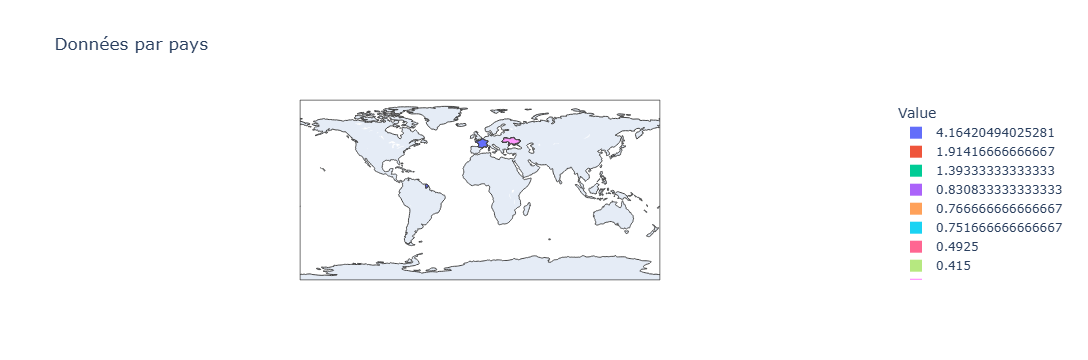

In [30]:
import plotly.express as px


# Créer une carte interactive
fig = px.choropleth(
    df,
    locations="Country or Area",
    locationmode="country names",
    color="Value",
    color_continuous_scale="Viridis",
    title="Données par pays"
)

# Afficher la carte
fig.show()